In [0]:
#Importing all important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Loading the Data
ad_data=pd.read_csv("advertising.csv")

In [7]:
#Sampled Description of the Data
ad_data.head()

Daily Time Spent on Site  Age  ...            Timestamp  Clicked on Ad
0                     68.95   35  ...  2016-03-27 00:53:11              0
1                     80.23   31  ...  2016-04-04 01:39:02              0
2                     69.47   26  ...  2016-03-13 20:35:42              0
3                     74.15   29  ...  2016-01-10 02:31:19              0
4                     68.37   35  ...  2016-06-03 03:36:18              0

[5 rows x 10 columns]

In [9]:
#Classified Information about the Data
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [10]:
#Full Description of the Data
ad_data.describe()

Daily Time Spent on Site          Age  ...         Male  Clicked on Ad
count               1000.000000  1000.000000  ...  1000.000000     1000.00000
mean                  65.000200    36.009000  ...     0.481000        0.50000
std                   15.853615     8.785562  ...     0.499889        0.50025
min                   32.600000    19.000000  ...     0.000000        0.00000
25%                   51.360000    29.000000  ...     0.000000        0.00000
50%                   68.215000    35.000000  ...     0.000000        0.50000
75%                   78.547500    42.000000  ...     1.000000        1.00000
max                   91.430000    61.000000  ...     1.000000        1.00000

[8 rows x 6 columns]

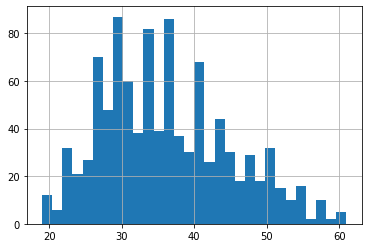

In [11]:
#PERFORMING EXPLORATORY DATA ANALYSIS
#Creating Histogram of Age.
ad_data['Age'].hist(bins=30)

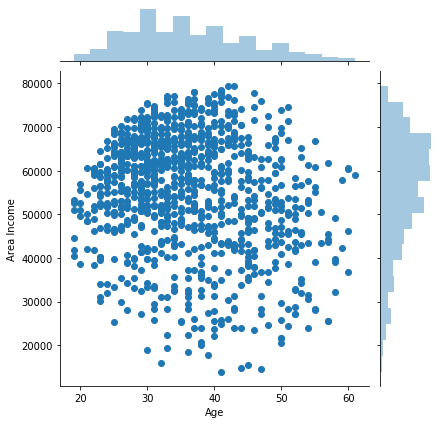

In [12]:
#Creating a jointplot showing Area Income versus Age.
sns.jointplot(x='Age', y='Area Income', data=ad_data, kind='scatter')


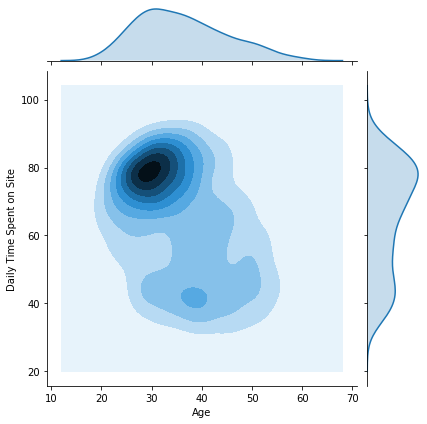

In [13]:
#Creating a jointplot showing the kde distributions of Daily Time spent on site vs. Age.
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde')
# kde: kenerl density estimation

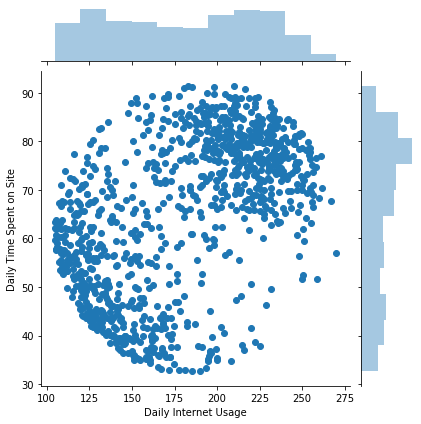

In [14]:
#Creating a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'.
sns.jointplot(x='Daily Internet Usage', y='Daily Time Spent on Site', data=ad_data, kind='scatter')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


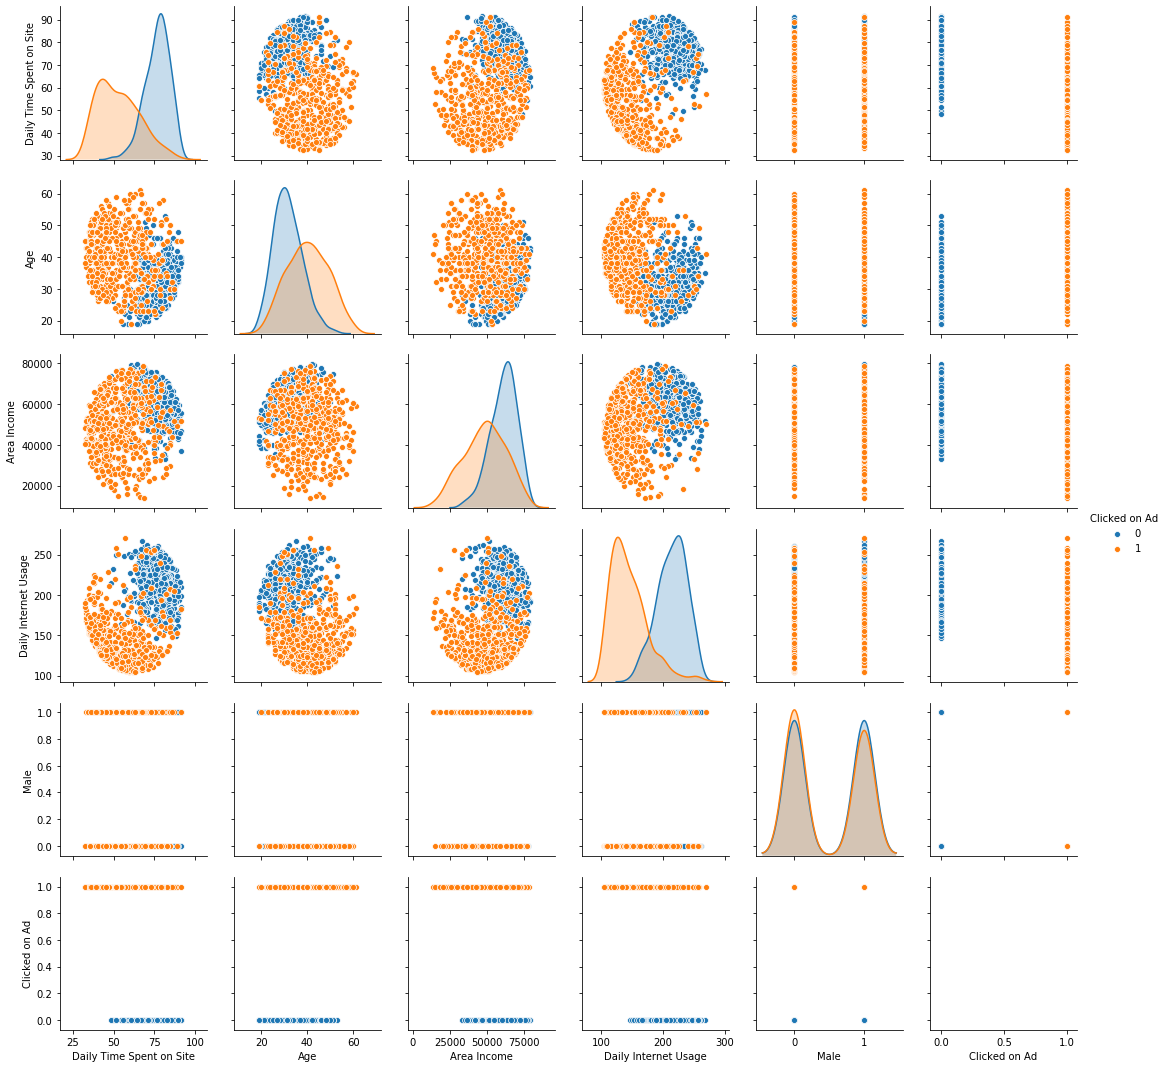

In [15]:
#Creating a pairplot with the hue defined by the 'Clicked on Ad' column feature.
sns.pairplot(ad_data, hue='Clicked on Ad')

In [0]:
#PERFORMING LOGISTIC REGRESSION
#Spliting the data into training set and testing set using train_test_split
from sklearn.model_selection import train_test_split

In [22]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [0]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
#Training and fitting a logistic regression model on the training set.
from sklearn.linear_model import LogisticRegression

In [26]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#PREDICTION AND EVALUATIONS
#Predicting values for the testing data.
predictions=logmodel.predict(X_test)

In [0]:
#Creating a classification report for the model.
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

